SENTIMENT ANALYSIS USING STOCK DATA 

first lets collect some data to perfom sentiment analysis. So I have collected data from finviz of stocks which are listed in Nasdaq ans the new york stock exchange. 

In [135]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN',
 'GOOG',
 'TSLA',
 'META',
 'INTC',
 'UBER',
 'DELL',
 'MSFT',
 'C',
 'MA',
 'WMT',
 'JPM',
 'MS',
 'ORCL',
 'NFLX',
 'MCD',
 'JNJ',
 'KO',
 'QCOM',
 'CSCO']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

    
    

   
  

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split('\r\n')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])


In [137]:

for i in range(2000):
    df['time'][i]=df['time'][i].strip()
    l=df['time'][i].split(' ')
    if(len(l)==2):
        
        if l[0]=='Today':
            l[0]='June-14-24'
        df['time'][i]=l[1]
        df['date'][i]=l[0]
        k=l[0]
    else:
        df['time'][i]=l[0]
        df['date'][i]=k


    
df.to_csv(r'C:\Users\ACER\Desktop\dataset.csv', index=False)



Here we have collected the data of about a week or ten days of the following firms:
amazon, google, tesla, intel ,Mcdonalds, cisco, Microsoft, bershire hathway, mastercard, visa, nike, walmart, jp morgan, netflix, coke, qualcom, johnson & johnson ,oracle, dell, uber

In [8]:
import pandas as pd

dataset=pd.read_csv(r'C:\Users\ACER\Desktop\dataset.csv')
dataset

,ticker,date,time,title
0,AMZN,June-14-24,12:59PM,Amazon Prime Video drives down ad prices for c...
1,AMZN,June-14-24,12:55PM,Amazon's AI-powered Alexa is reportedly not ev...
2,AMZN,June-14-24,10:00AM,Netflix Is Overvalued Amid Future Content Qual...
3,AMZN,June-14-24,09:56AM,Analyst Says Amazon.com Inc (NASDAQ:AMZN) Is P...
4,AMZN,June-14-24,09:50AM,Here's Why Amazon (AMZN) is a Strong Momentum ...
...,...,...,...,...
1995,CSCO,May-15-24,10:30PM,Cisco Systems (CSCO) Q3 2024 Earnings Call Tra...
1996,CSCO,May-15-24,08:54PM,"CSCO Stock Earnings: Cisco Systems Beats EPS, ..."
1997,CSCO,May-15-24,08:37PM,"Analyst Report: Cisco Systems, Inc."
1998,CSCO,May-15-24,06:15PM,Cisco Rallies After Upbeat Forecast Shows Spen...


Now I have used VADER_LEXICON inorder to extract the features from the new headlines. Vader from the nltk library uses nlp techniques to give score a text as negetive, neutral, positive, and compound 

new starting

In [9]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer


vader = SentimentIntensityAnalyzer()
lst=['neg','neu','pos','compound']
for i in lst:
    func=lambda title: vader.polarity_scores(title)[i]
    dataset[i]=dataset['title'].apply(func)
dataset=dataset.reset_index()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
del dataset['index']


Just converted the date to te required format for our analysis

In [11]:
from datetime import datetime
import pandas as pd


def convert_date_format(date_str):
    for fmt in ('%B-%d-%y', '%b-%d-%y'):
        try:
            
            date_obj = datetime.strptime(date_str, fmt)
            
            new_date_str = date_obj.strftime('%Y-%m-%d')
            return new_date_str
        except ValueError:
            continue
    raise ValueError(f"Date format for '{date_str}' is not recognized.")


dataset['date'] = dataset['date'].apply(convert_date_format)




just store the data as finviz add on the data of newer dates , this line could be ommited

In [12]:
df_test=pd.read_csv(r'C:\Users\ACER\Desktop\dataset_test_2.csv')
dataset=pd.concat([dataset,df_test])

extracted the unique dates

In [ ]:

tickers=dataset['ticker'].unique()
tickerz=list(tickers)
req_date_dict={}
for i in range(100,2301,100):
    req_date_dict[dataset.iloc[i-100,0]]=list(dataset.iloc[i-100:i,1].unique())
    
req_date_dict


In [14]:
new_req_date_dict={'AMZN':['2024-5-12'],'GOOG':['2024-5-12'],'TSLA':['2024-5-12'],'META':['2024-5-12'],'INTC':['2024-5-12'],'UBER':['2024-5-12'],'DELL':['2024-5-12'],'MSFT':['2024-5-12'],'C':['2024-5-12'],'MA':['2024-5-12'],'WMT':['2024-5-12'],'JPM':['2024-5-12'],'MS':['2024-5-12'],'ORCL':['2024-5-12'],'NFLX':['2024-5-12'],'MCD':['2024-5-12'],'JNJ':['2024-5-12'],'KO':['2024-5-12'],'QCOM':['2024-5-12'],'CSCO':['2024-5-12'],'BRK-A':['2024-4-12'],'NKE':['2024-5-12'],'V':['2024-5-12']}


download the required data from yahoo finance of the considered stocks

In [15]:
import yfinance as yf
new_dataset=pd.DataFrame()
for keys,values in new_req_date_dict.items():
    data=yf.download(keys,start=values[0],end='2024-6-15')
    data['ticker']=keys
    new_dataset=pd.concat([new_dataset,data])
    
new_dataset=new_dataset.reset_index()
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

label the return

In [16]:
new_dataset['return']=new_dataset['Adj Close'].shift(-1)-new_dataset['Adj Close']
new_dataset['return']=new_dataset['return'].fillna(0)
new_dataset['labels']=[1 if return_val>0 else -1 if return_val<0 else 0 for return_val in new_dataset['return']]


extract the labels column and merge it with the dataset which contains the sentiment scores

In [17]:
label_dict={}
filtered_df=pd.DataFrame()
for key,value in req_date_dict.items():
    for i in value:
        i = pd.to_datetime(i)
        df = new_dataset[(new_dataset['Date'] == i) & (new_dataset['ticker'] == key)]
        filtered_df=pd.concat([filtered_df,df])


filtered_df=filtered_df.reset_index()
    

In [18]:
del filtered_df['index']

In [19]:
filtered_df['Date']=filtered_df['Date'].dt.date


In [20]:
dataset['labels']=None


In [21]:
for i in range(2300):
    for j in range(326):
        if dataset.iloc[i,1]==filtered_df.iloc[j,0].strftime('%Y-%m-%d') and dataset.iloc[i,0]==filtered_df.iloc[j,7]:
            dataset.iloc[i,8]=filtered_df.iloc[j,9]
            break
        
    #==filtered_df.iloc[j,0] and dataset.iloc[i,0]==filtered_df.iloc[]

In [22]:
dataset['labels']=dataset['labels'].fillna(0)


In [23]:
dataset = dataset[dataset.iloc[:, 8] != 0]
dataset=dataset.reset_index()
#del dataset['index']


In [24]:
del dataset['index']

In [25]:
for i in range(2090):
    if dataset.iloc[i,7]==0:
        dataset.iloc[i,8]=0


In [61]:
import pandas as pd
dataset=pd.read_csv(r'C:\Users\ACER\Desktop\dataset2.csv')

remove the data on which we test for in this project

In [62]:
dataset_train=dataset.iloc[:1854,:]
dataset_test=dataset.iloc[1854:2090,:]
labels_test=dataset_test["labels"]
del dataset_test['labels']
labels_train=dataset_train['labels']
del dataset_train['labels']

MACHINE LEARNING PART


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

here we train our model on the sentiment scores which were extracted from vader, these scores enacts as features of the sentiments .

In [64]:
x_train=dataset_train[['neg','neu','pos','compound']]
y_train=labels_train
x_test=dataset_test[['neg','neu','pos','compound']]
dataset_test=dataset_test.reset_index()

del dataset_test['index']

In [94]:

filtered_df['percent_return']=(filtered_df['return']/filtered_df['Adj Close'])


Decision Trees were used to classify the sentiments based on the scores as 1,-1 and 0 here 1 predicts a positive score -1 a negetive and 0 a neutral sentiment

inorder to tune the hyperparameters we used gridsearch expecting the best model obtainable

In [95]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()


param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_


final_model = DecisionTreeClassifier(**best_params)
final_model.fit(x_train, y_train)


y_pred = final_model.predict(x_test)
print(accuracy_score(y_pred,labels_test))
print(confusion_matrix(y_pred,labels_test))

0.7584745762711864
[[ 54   0  38]
 [  0 109   0]
 [ 19   0  16]]


In [67]:
dataset_test['return']=None
dataset_test['percent_return']=None

portfolio metrics

In [68]:
dataset_test['labels']=y_pred



add in two new columns percentage returns and the sentiment returns

In [69]:
for i in range(236):
    for j in range(326):
        if dataset_test.iloc[i,1]==filtered_df.iloc[j,0].strftime('%Y-%m-%d') and dataset_test.iloc[i,0]==filtered_df.iloc[j,7]:
            dataset_test.iloc[i,8]=filtered_df.iloc[j,8]
            dataset_test.iloc[i,9]=filtered_df.iloc[j,10]



what our strategy really does is that when a positive slope is predicted we tend to buy a share and sell it the next day. whereas when a negative slope is expected we short a share on that day. And the neutral signal keeps us away from the markets.

In [70]:
dataset_test['senti_return']=dataset_test['return']*dataset_test['labels']
dataset_test['senti_return'].cumsum()
dataset_test['senti_percent_return']=dataset_test['percent_return']*dataset_test['labels']



In [71]:
brk_a=dataset_test[:71]
nike=dataset_test[72:156]
visa=dataset_test[157:]

here we plot the senti return we've got

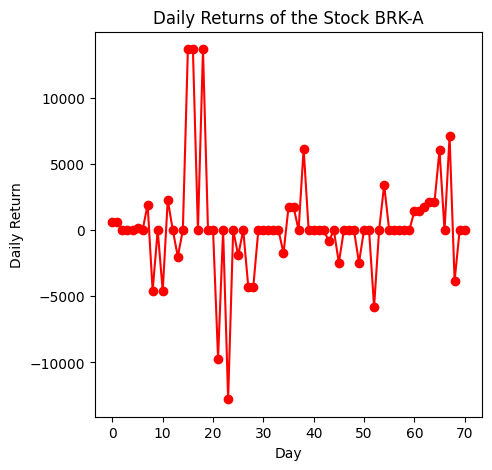

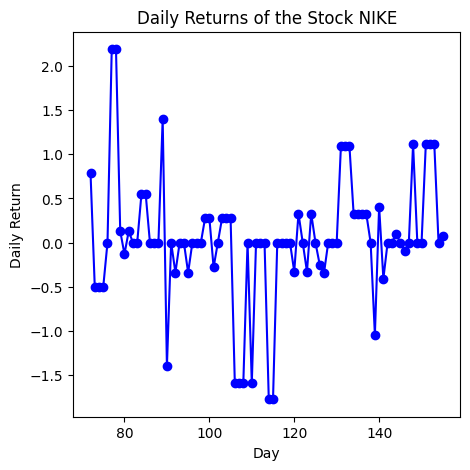

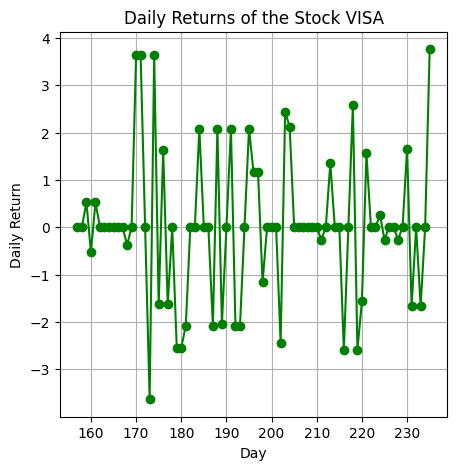

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(brk_a['senti_return'], marker='o',color='red')
plt.title('Daily Returns of the Stock BRK-A')
plt.xlabel('Day')
plt.ylabel('Daily Return')

plt.figure(figsize=(5, 5))
plt.plot(nike['senti_return'], marker='o',color='blue')
plt.title('Daily Returns of the Stock NIKE')
plt.xlabel('Day')
plt.ylabel('Daily Return')

plt.figure(figsize=(5, 5))
plt.plot(visa['senti_return'], marker='o',color='green')
plt.title('Daily Returns of the Stock VISA')
plt.xlabel('Day')
plt.ylabel('Daily Return')

plt.grid(True)
plt.show()


this was just for storing this could be omited

In [73]:
dataset_test.to_csv(r'C:\Users\ACER\Desktop\dataset3.csv', index=False)

In [77]:
dataset_test['senti_percent_return'].sum()

0.07563818697029963

SHARPE RATIO

to calculate the sharpe ratio as i had collected the news data of only a month( around 40 days) i have converted the risk free rate for around 40 days of all the 3 stocks(40+30+30) . got the return per month and added a correction to the standard deviation to let it suit our case

In [101]:
import numpy as np
risk_free_rate = (1+0.045)**(100/365)-1


return_per_month=dataset_test['senti_percent_return'].sum()*(120/236)


std_dev_returns = np.std(dataset_test['senti_percent_return'])*2.5


sharpe_ratio = (return_per_month- risk_free_rate) / std_dev_returns

print('return_per_month : ',return_per_month)
print('std_dev_returns : ',std_dev_returns)
print('sharpe_ratio : ',sharpe_ratio)

return_per_month :  0.038460095069643874
std_dev_returns :  0.01656321216763425
sharpe_ratio :  1.5895266053965686


WIN RATIO

In [102]:
positive_mask = dataset_test['senti_return'] > 0
num_positive_returns = positive_mask.sum()
negative_mask = dataset_test['senti_return'] < 0
num_negative_returns = negative_mask.sum()
print('num_positive_returns : ',num_positive_returns)
print("num_negative_returns : ",num_negative_returns)
print('win ratio :',num_positive_returns/num_negative_returns)

num_positive_returns :  70
num_negative_returns :  57
win ratio : 1.2280701754385965


NET RETURNS AFTER STRATEGY

In [93]:
print("net returns in strategy : ",dataset_test['senti_return'].sum())
#print(dataset_test['senti_return'].sum())

net returns in strategy :  23972.22939300537


TOTAL NUMBER OF TRADES

In [76]:
print('total number of trades : ',num_positive_returns+num_negative_returns)

total number of trades :  127
